# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

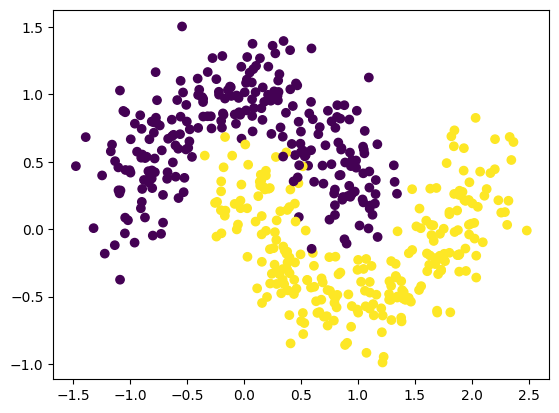

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=10)
svm = SVC(kernel='linear', C=5)

for model in [lr, svm]:
  model.fit(moons_points, moons_labels)

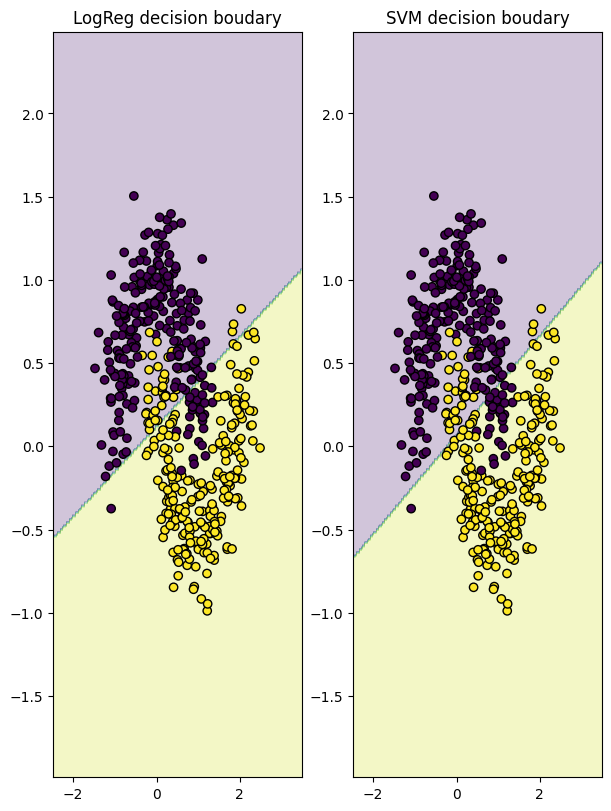

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 8), layout="constrained")
h = 0.02

# вводим сетку, чтобы построить границу классов
x_min, x_max = moons_points[:, 0].min() - 1, moons_points[:, 0].max() + 1
y_min, y_max = moons_points[:, 1].min() - 1, moons_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

# предсказываем границы классов
Z1 = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

Z2 = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

ax[0].contourf(xx, yy, Z1, alpha=0.25)
ax[0].scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, alpha=1.0, edgecolor="black")
ax[0].set_title(f"LogReg decision boudary")

ax[1].contourf(xx, yy, Z2, alpha=0.25)
ax[1].scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, alpha=1.0, edgecolor="black")
ax[1].set_title(f"SVM decision boudary")
plt.show()


График похож на недообучение

Посчитаем точность

In [5]:
from sklearn.metrics import accuracy_score

predictions = lr.predict(moons_points)
acc = accuracy_score(moons_labels, predictions)
print(f'accuracy: {acc}')

accuracy: 0.86


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [6]:
# для удобства написали функцию, которая будет строить границу классов
def plot_boundary(model, data, labels, model_name):
  h = 0.02

  x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
  y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  Z1 = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z1 = Z1.reshape(xx.shape)

  plt.contourf(xx, yy, Z1, alpha=0.25)
  plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=1.0, edgecolor="black")
  plt.title(f"{model_name} decision boudary")
  plt.show()

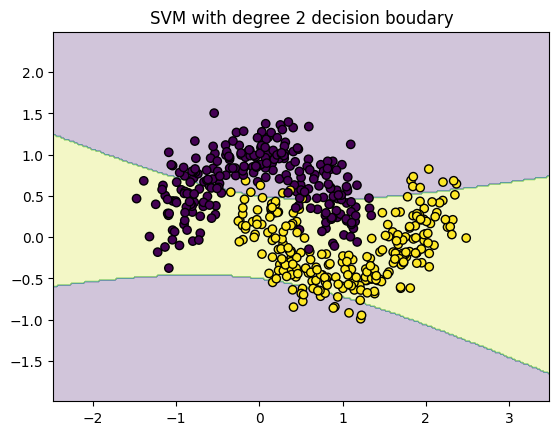

In [7]:
svm = SVC(kernel='poly', C=5, degree=2)
svm.fit(moons_points, moons_labels)
plot_boundary(svm, moons_points, moons_labels, 'SVM with degree 2')

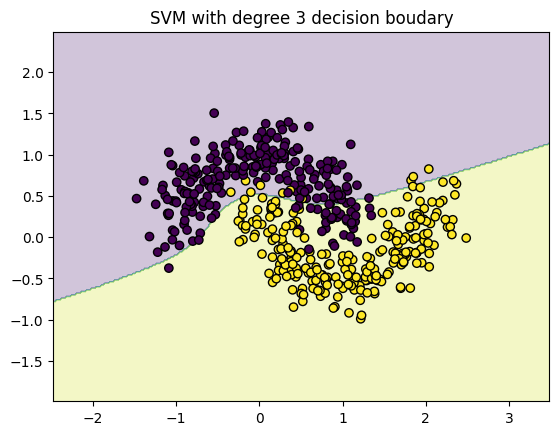

In [8]:
svm = SVC(kernel='poly', C=5, degree=3)
svm.fit(moons_points, moons_labels)
plot_boundary(svm, moons_points, moons_labels, 'SVM with degree 3')

степень 2 все ещё выглядит как недообучение, а вот 3-ия степень уже лучше разделяет классы.

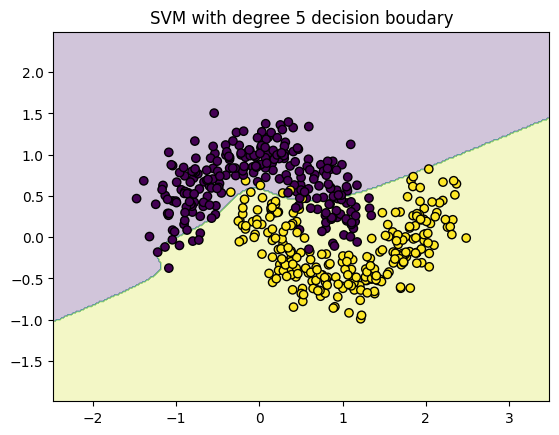

In [9]:
svm = SVC(kernel='poly', C=5, degree=5)
svm.fit(moons_points, moons_labels)
plot_boundary(svm, moons_points, moons_labels, 'SVM with degree 5')

степень 5 похожа на переобучение. Таким образом с полиномиальными ядрами я бы выбрал степень 3. Если брать степени выше - модель начнет подстравиваться под выбросы.

Попробуем ядро rbf

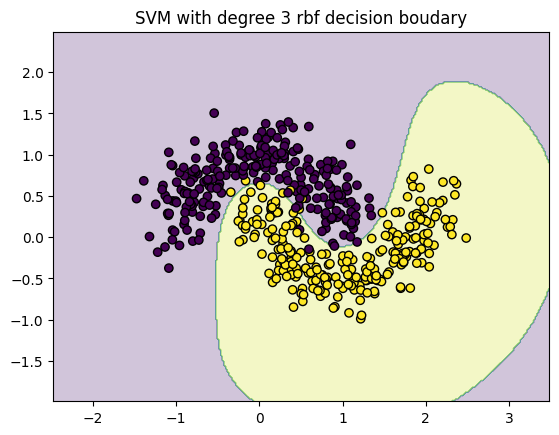

In [10]:
svm = SVC(kernel='rbf', C=5, degree=3)
svm.fit(moons_points, moons_labels)
plot_boundary(svm, moons_points, moons_labels, 'SVM with degree 3 rbf')

Визуально классы очень хорошо разделимы

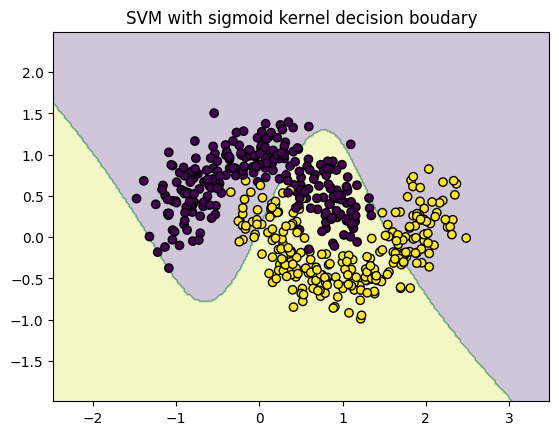

In [11]:
svm = SVC(kernel='sigmoid', C=5)
svm.fit(moons_points, moons_labels)
plot_boundary(svm, moons_points, moons_labels, 'SVM with sigmoid kernel')

Сигмоида не выглядит надежным выбором

**Вывод:** Можно заметить, что границы разделений похожи на функции, которые мы используем в качестве ядра. И это не удивительно, ведь svm по сути является афинным преобразованием функции от исходных данных. Если исходные данные заданы известной $f(x)$ в нашем случае это сигмоида, полином и т.п., то сразу же из определения получаем, что и граница раздела будет выглядеть похожим образом

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly_features = poly.fit_transform(moons_points)

lr = LogisticRegression(C=10)
lr.fit(poly_features, moons_labels)

LogisticRegression(C=10)

Сейчас пространство признаков представлено несколькими переменными и мы не можем нарисовать разделяющую границу без выбора конкретных признаков и без использования методов понижения размерности, поэтому просто укажем метрику.

В нашем случае:



In [14]:
predictions = lr.predict(poly_features)
acc = accuracy_score(moons_labels, predictions)
print(f'accuracy: {acc}')

accuracy: 0.978


Заметим, что точность намного выше, чем ранее. Полиномиальные признаки очень помогли.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

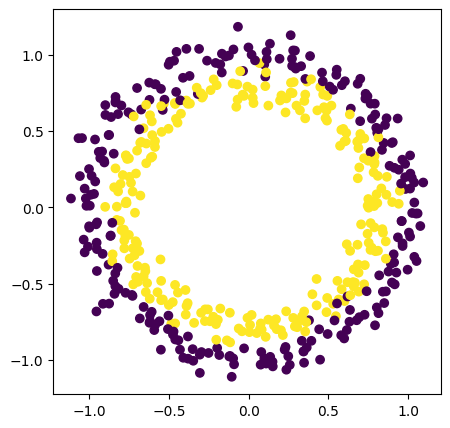

In [15]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

Видно, что разделяющая граница сложная, давайте мы переведем наши данные в полярную систему координат.

In [16]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

polar_features = np.array(np.vectorize(cart2pol)(circles_points[:, 0], circles_points[:, 1])).T

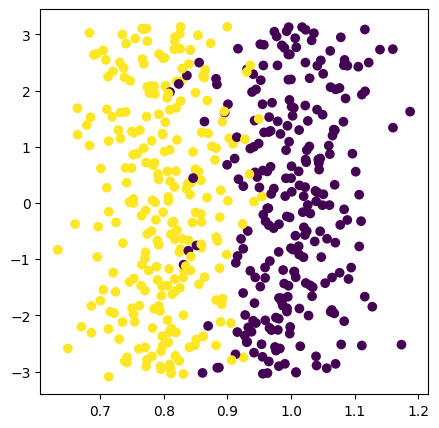

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(polar_features[:, 0], polar_features[:, 1], c=circles_labels)

Теперь мы получили линейную границу разделения!

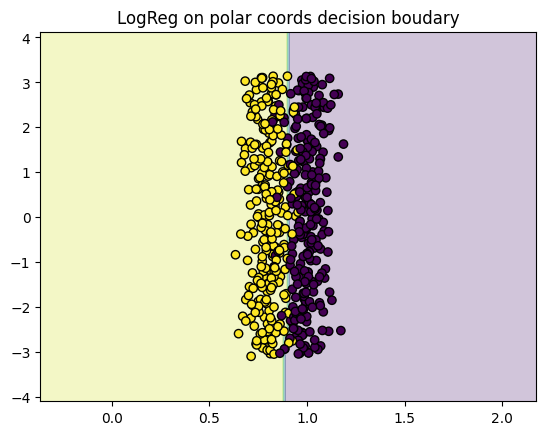

In [18]:
lr = LogisticRegression(C=10)
lr.fit(polar_features, circles_labels)
plot_boundary(lr, polar_features, circles_labels, 'LogReg on polar coords')

Практически идеальное разделение классов. Давайте посчитаем метрику

In [19]:
y_pred = lr.predict(polar_features)
accuracy_score(circles_labels, y_pred)

0.938

достойное качество классификации

And even more:

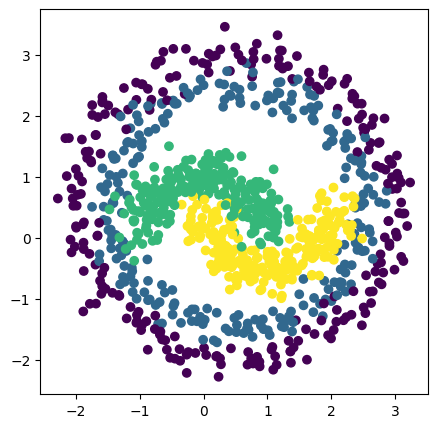

In [20]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Давайте вновь преобразуем в полярные координаты

In [21]:
polar_features_new = np.array(np.vectorize(cart2pol)(points[:, 0], points[:, 1])).T

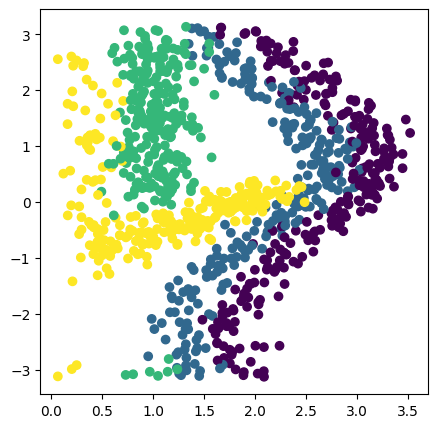

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(polar_features_new[:, 0], polar_features_new[:, 1], c=labels)

Кажется будто тут будет легче разделить классы, чем на исходных данных

Натреним SVM на наших данных

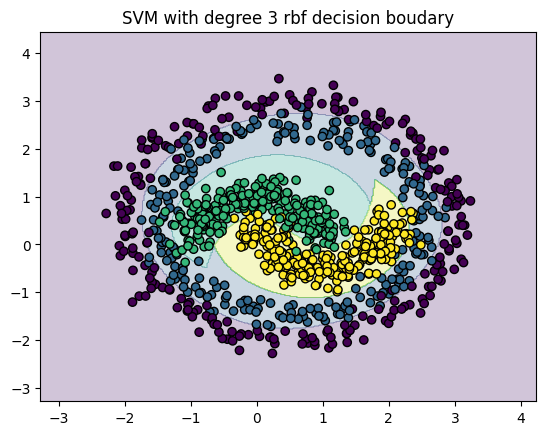

In [23]:
svm1 = SVC(kernel='rbf', C=5, degree=3)
svm1.fit(points, labels)
plot_boundary(svm1, points, labels, 'SVM with degree 3 rbf')

Выглядит очень хорошо

In [24]:
y_pred = svm1.predict(points)
accuracy_score(labels, y_pred)

0.934

Давайте обучим на фичах в полярных координатах и сравним качество

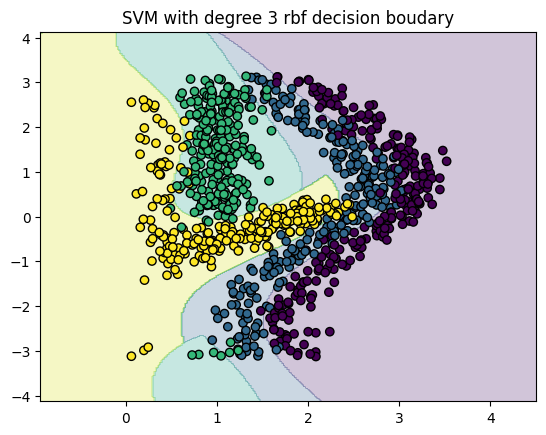

In [25]:
svm2 = SVC(kernel='rbf', C=5, degree=3)
svm2.fit(polar_features_new, labels)
plot_boundary(svm2, polar_features_new, labels, 'SVM with degree 3 rbf')

Посчитаем точность

In [26]:
pred1 = svm1.predict(points)
pred2 = svm2.predict(polar_features_new)

acc1 = accuracy_score(labels, pred1)
acc2 = accuracy_score(labels, pred2)

In [27]:
print(f'SVM on raw features: {acc1}\nSVM on features in polar coords: {acc2}')

SVM on raw features: 0.934
SVM on features in polar coords: 0.934


Как вы можете видеть, результаты для модели SVM такие же, но изменение системы координат может быть действительно полезным, если все данные расположены по кругу, как в предыдущем примере, потому что, если данные линейно разделимы, мы можем использовать простые модели и экономить ресурсы!